# Lab 1, Maria Chernyavskaya, Section AB

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

## Problem 1

In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X; and the average number of gamma-rays emitted by your hypothetical source is Y, larger than X. I have picked X = 5, and Y = 8.

### Part A:
Show how the probability distribution of the background changes as you integrate (sum) for more days.

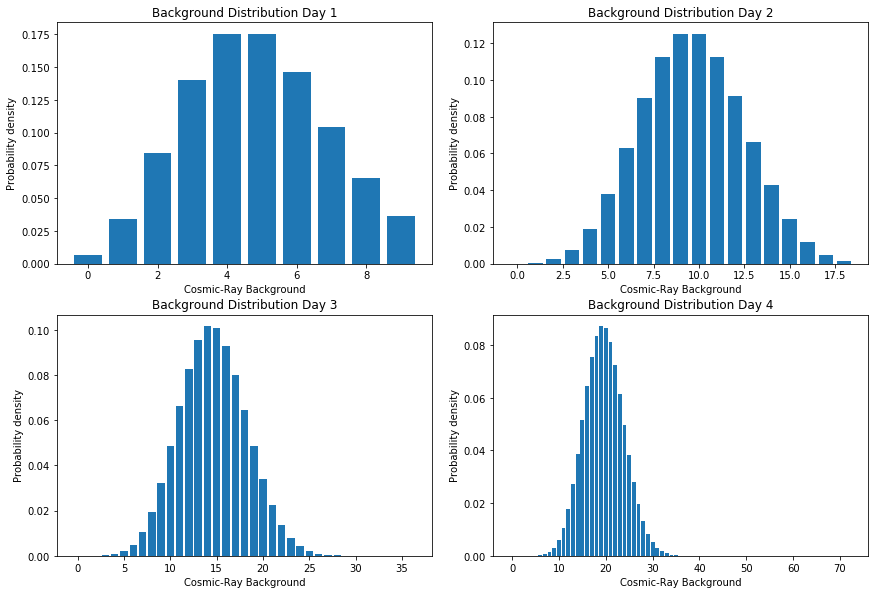

In [2]:
X = 5 # average cosmic ray background
fig, ax = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout(h_pad = 3, w_pad = 3)
x = np.arange(0, 10)
dist = stats.poisson.pmf(x, X)
ax=ax.flatten()
ax[0].set_title("Background Distribution Day 1")
ax[0].bar(x, dist)
ax[0].set_xlabel('Cosmic-Ray Background')
ax[0].set_ylabel('Probability density')

for i in range(1, 4):
    dist = np.convolve(dist, stats.poisson.pmf(x, X))
    x = np.arange(0, len(dist))
    ax[i].set_title("Background Distribution Day " + str(i + 1))
    ax[i].bar(x, dist)
    ax[i].set_xlabel('Cosmic-Ray Background')
    ax[i].set_ylabel('Probability density')

Above are unlogged plots of the distribution over time. We can see the Poisson distribution becoming wider with each day: day 1 it goes from 0 to 10, and by day 4 it's from 0 to 40. The value that it centers around moves to the right, from 5 to 20, in what seems to be a multiplicative motion $ x * Days$.

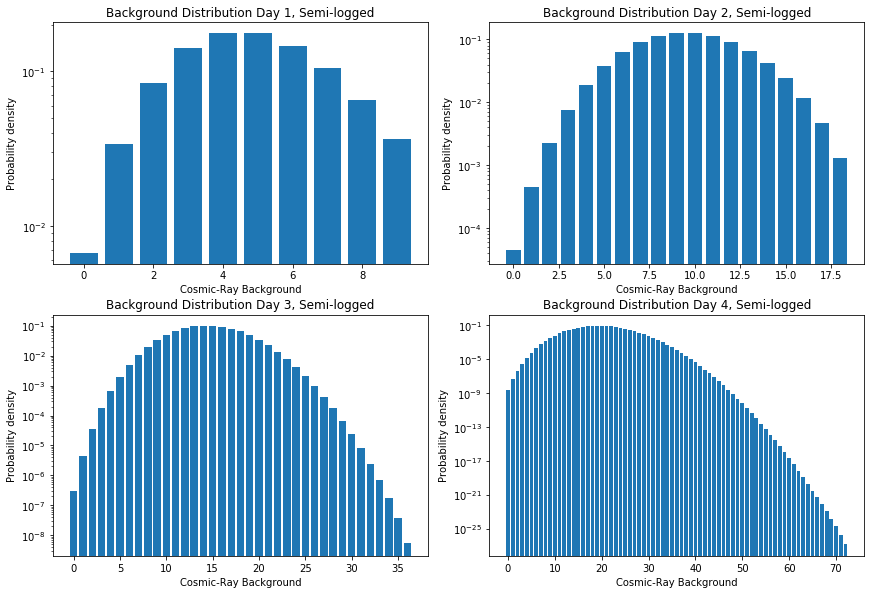

In [3]:
X = 5 # average cosmic ray background
fig, ax = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout(h_pad = 3, w_pad = 3)
x = np.arange(0, 10)
dist = stats.poisson.pmf(x, X)
ax=ax.flatten()
ax[0].set_title("Background Distribution Day 1, Semi-logged")
ax[0].bar(x, dist)
ax[0].set_yscale('log')
ax[0].set_xlabel('Cosmic-Ray Background')
ax[0].set_ylabel('Probability density')


for i in range(1, 4):
    dist = np.convolve(dist, stats.poisson.pmf(x, X))
    x = np.arange(0, len(dist))
    ax[i].set_yscale('log')
    ax[i].set_title("Background Distribution Day " + str(i + 1) + ", Semi-logged")
    ax[i].bar(x, dist)
    ax[i].set_xlabel('Cosmic-Ray Background')
    ax[i].set_ylabel('Probability density')

Now, let's look at the semi-logged plots of the same thing to better see how the distribution changes. The same widening and shit to the left is observed, but the wings are more visible.

### Part B:
Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

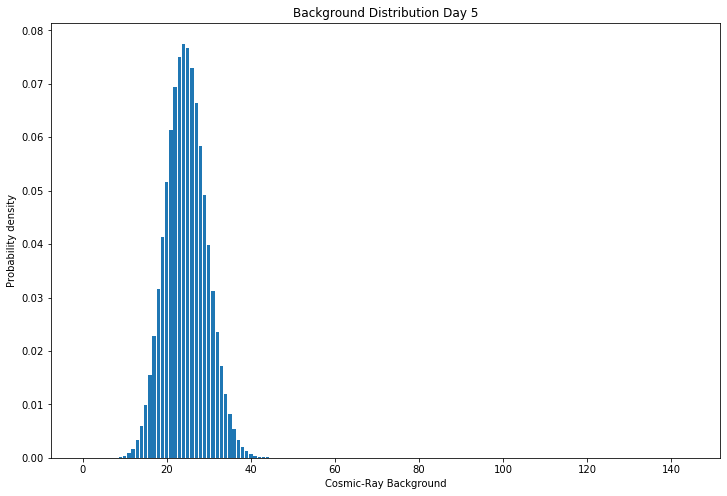

In [4]:
X = 5
x = np.arange(0,10)
dist = stats.poisson.pmf(x, X)

for i in range(1, 5):
    dist = np.convolve(dist, stats.poisson.pmf(x, X))
    x = np.arange(0, len(dist))

fig = plt.figure(figsize=(12,8))
plt.title("Background Distribution Day 5")
plt.bar(x, dist)
plt.xlabel('Cosmic-Ray Background')
plt.ylabel('Probability density')
plt.show()

Above is our 5th day convoluted Poisson. It still looks visually similar to the other Poissons, but it's harder to tell if it really is Poissoninan. To double check, let's look at a semi-log plot:

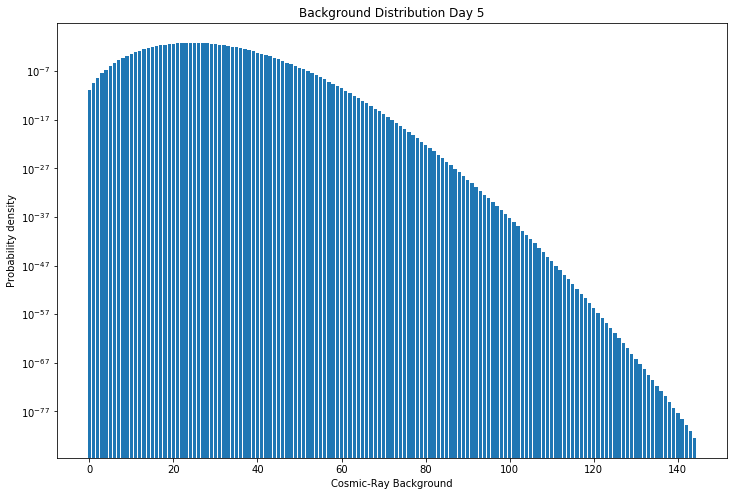

Chi-square value:  20879.999999999996  P-value:  0.2392403372216254


In [5]:
X = 5
x = np.arange(0,10)
dist = stats.poisson.pmf(x, X)

for i in range(1, 5):
    dist = np.convolve(dist, stats.poisson.pmf(x, X))
    x = np.arange(0, len(dist))
    
fig = plt.figure(figsize=(12,8))
plt.title("Background Distribution Day 5")
plt.bar(x, dist)
plt.yscale('log')
plt.xlabel('Cosmic-Ray Background')
plt.ylabel('Probability density')
plt.show()

table = pd.crosstab(dist, stats.poisson.pmf(x, X))
chi2, p, dof, expected = chi2_contingency(table.values)
print("Chi-square value: ", chi2, " P-value: ", p)

The graph above shows that the summed distribution is still Poissonian! In semi-logged space, the shape of the curve indicates Poissonian distribution. Mathematically, this can be proven through the null hypothesis significance test, specifically chi-squared testing. A chi-squared test is a metric used to measure independence of variables- this is what the null hypothesis hinges on. If the variables (our gamma ray frequencies) are independent, then the null hypothesis does not apply, and this curve is NOT Gaussian. This is the formula for a $\chi^2$ test:

$$\chi^2 = \sum \frac{(f_o-f_e)^2}{f_e}$$

where $f_o$ is the observed frequency of gamma rays
and $f_e$ is the expected frequency if NO relationship existed between the gamma rays

The threshhold for if the chi-squared test is passed depends on p-value, which is a probability that indicates whether or not variables are independent of each other. To decide this, we pick a confidence threshhold, say, 95% (this is a commonly used number), and the p-value must be less than 1 - confidence threshhold (in our case, 0.5). The p value we got was 0.239, which is less than 0.5. This means that the variables are *not* independent; thus the two Poisson distributions are correlated with one another and add up to anoter Poisson distribution.

### Part C:
Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theorem.

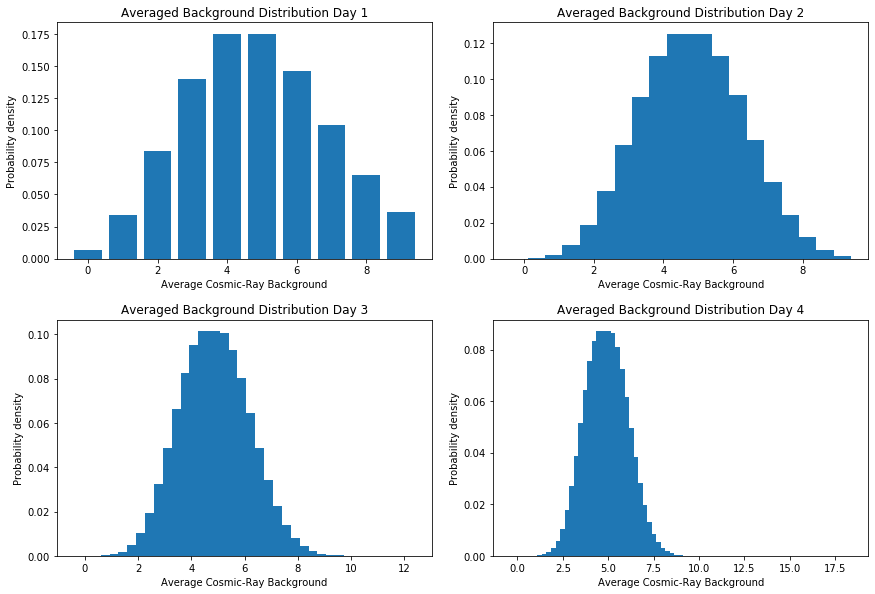

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (12,8))
plt.tight_layout(h_pad = 4, w_pad = 3)
x = np.arange(0, 10)
dist = stats.poisson.pmf(x, X)
ax = ax.flatten()
ax[0].set_title("Averaged Background Distribution Day 1")
ax[0].set_xlabel('Average Cosmic-Ray Background')
ax[0].set_ylabel('Probability density')
ax[0].bar(x, dist)

for i in range(1, 4):
    dist = np.convolve(dist, stats.poisson.pmf(x, X))
    x = np.arange(0, len(dist))
    ax[i].set_title("Averaged Background Distribution Day " + str(i + 1))
    ax[i].bar(x / (i + 1), dist)
    ax[i].set_xlabel('Average Cosmic-Ray Background')
    ax[i].set_ylabel('Probability density')

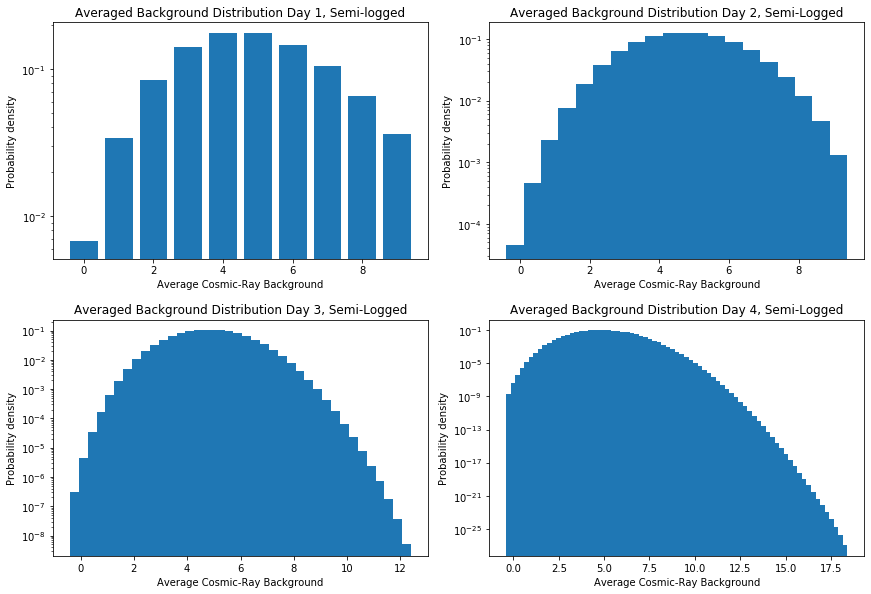

In [7]:
fig, ax = plt.subplots(2, 2, figsize = (12,8))
plt.tight_layout(h_pad = 4, w_pad = 3)
x = np.arange(0, 10)
dist = stats.poisson.pmf(x, X)
ax = ax.flatten()
ax[0].set_yscale('log')
ax[0].set_title("Averaged Background Distribution Day 1, Semi-logged")
ax[0].bar(x, dist)
ax[0].set_xlabel('Average Cosmic-Ray Background')
ax[0].set_ylabel('Probability density')


for i in range(1, 4):
    dist = np.convolve(dist, stats.poisson.pmf(x, X))
    x = np.arange(0, len(dist))
    ax[i].set_yscale('log')
    ax[i].set_title("Averaged Background Distribution Day " + str(i + 1)+ ", Semi-Logged")
    ax[i].bar(x / (i + 1), dist)
    ax[i].set_xlabel('Average Cosmic-Ray Background')
    ax[i].set_ylabel('Probability density')

Again, unlogged and semi-logged plots above. In the unlogged plots it is clear that with every convolution, the distribution becomes more and more Gaussian. It's a little hard to tell in the semi-log because the x-value range cuts off at 0, but the semi-logged graphs do become more parabola-looking with each iteration nonetheless. This makes sense with respect to part B) because when averaging, we are adding all of the discrete samples of two Poisson distributions together into one. Said differently, this means that the previously independent variables now have a dependability: the average is the mathematical relationship between all the x-values (gamma rays) together. With more samples we get more and more of this intertwining of variables, and thus more Gaussian data. The Central Limit Theorem relates to this in the sense that as we increase the number of samples and intertwine them more and more through means such as convolving distributions and averaging them, the distribution will increasingly look more Gaussian over time regardless of the shape of the population distributions.

### Part D:
Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

In [8]:
N = 20 # number of days
Y = 8 # average number of gamma rays emitted
seen = N * Y
integral = stats.poisson.cdf(seen, N*X)
print("Probability: " + str(integral))
sigma = stats.norm.ppf(integral)
print("Sigma: " + str(sigma))

Probability: 0.9999999873833619
Sigma: 5.57165359561126


In the math here, both the average of gamma rays emitted and the background are multiplied by the days past because the question that we're answering pertains to what was observed over N days. Also, wow! That's an event greater than 5$\sigma$!

## Problem 2
Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

### Part A:
Show how the distribution changes as you average over more observing intervals.

Here are some unlogged, and semi-logged plots:

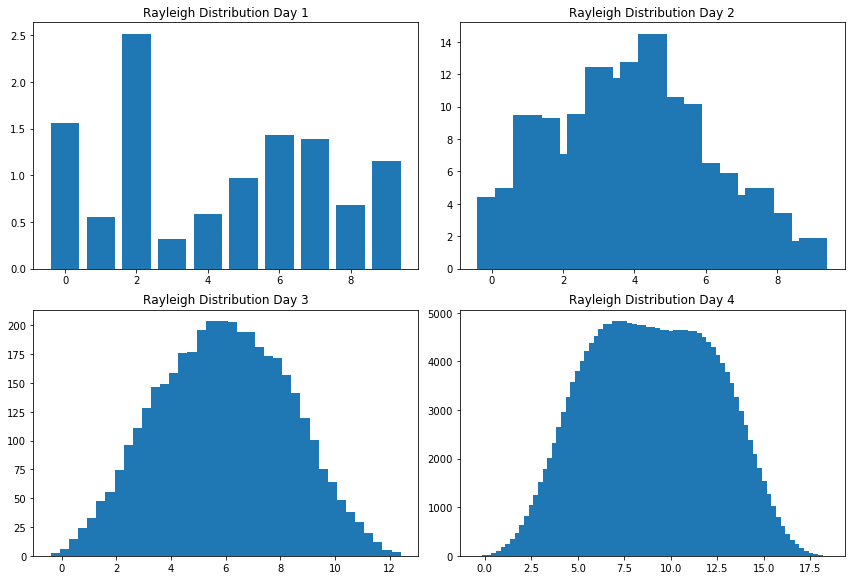

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout(h_pad=2)
x = np.arange(0, 10)
dist = stats.rayleigh.rvs(size = len(x))
ax = ax.flatten()
ax[0].set_title("Rayleigh Distribution Day 1")
ax[0].bar(x, dist)


for i in range(1, 4):
    dist = np.convolve(dist, stats.rayleigh.rvs(size = len(x)))
    x = np.arange(0, len(dist))
    ax[i].set_title("Rayleigh Distribution Day " + str(i + 1))
    ax[i].bar(x / (i + 1), dist)

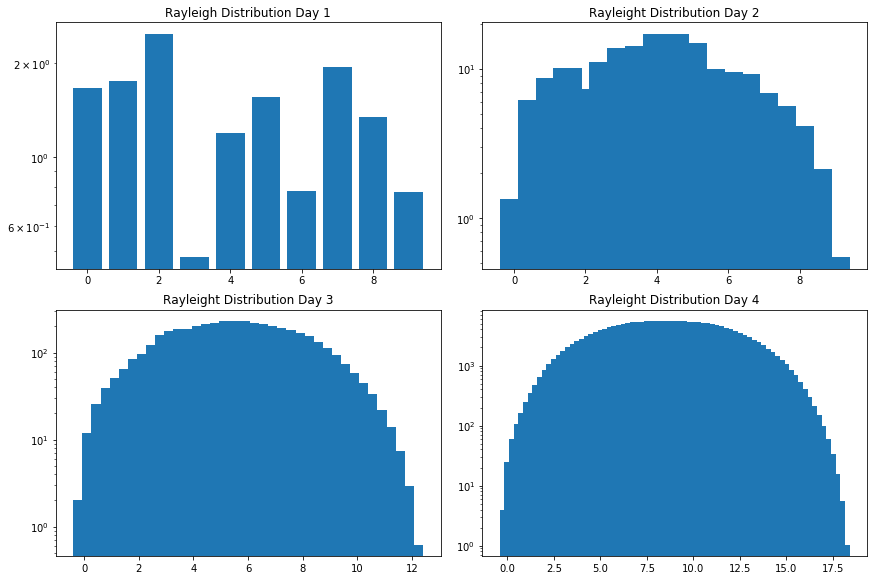

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout(h_pad=2)
x = np.arange(0, 10)
dist = stats.rayleigh.rvs(size = len(x))
ax = ax.flatten()
ax[0].set_title("Rayleigh Distribution Day 1")
ax[0].bar(x, dist)
ax[0].set_yscale('log')

for i in range(1, 4):
    dist = np.convolve(dist, stats.rayleigh.rvs(size = len(x)))
    x = np.arange(0, len(dist))
    ax[i].set_title("Rayleight Distribution Day " + str(i + 1))
    ax[i].bar(x / (i + 1), dist)
    ax[i].set_yscale('log')

### Part B:
Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

If we look at the graphs above, convergence to a Gaussian doesn't actually happen! I checked with more days, and while the un-logged version looks like it's becoming a continuously more wide Gaussian, the semi-log plot tells a different story. It is way wider than a parabola, which means it is still a Rayleigh distribution. It does look pretty close in the un-logged plots, however.

## Problem 3
The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years (wikipedia, scientific paper), and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.

We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.

### Version 1
You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

#### Part A:
From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

In [11]:
X = 2 # width of the background Gaussian dist.
Y = 12.6 # strength of signal
prob = 1 - stats.norm.cdf(Y, scale = X)
sigma = stats.norm.ppf(1 - prob)
print('Significance: ' + str(sigma) + ' sigma')

Significance: 6.2999999783763405 sigma


Yes! This is above 5$\sigma$, therefore I can claim discovery!

### Version 2
You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

#### Part B:
If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

The statistical question is: 

What is the probability of having a 5$\sigma$ event (a legitimate detection) in a set of 10k pixels?

In [12]:
ranges = np.linspace(stats.norm.ppf(0.00001, scale=X),
                stats.norm.ppf(0.99999, scale=X),
                10000)

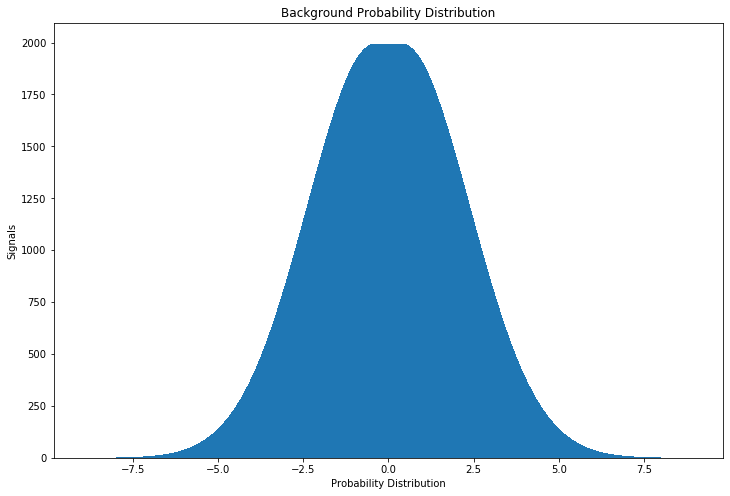

In [13]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
plt.bar(ranges, stats.norm.pdf(ranges, scale = X) * 10000)
plt.title('Background Probability Distribution')
plt.xlabel('Probability Distribution')
plt.ylabel('Signals')
plt.show()

#### Part C:
Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [14]:
prob = (1 - stats.norm.cdf(Y, scale=X)) * 10000
sigma = stats.norm.ppf(1 - prob)
print('The significance is: ' + str(sigma) + ' sigma')

The significance is: 4.672437788826663 sigma


The significance of my 12.6 signal from Part 1 was 6.2999999783763405$\sigma$. Comparing this with my Part 2 result of 4.672437788826663$\sigma$, this tells me that when I know the pixel, this signal is a discovery. In 10k pixels, it does not qualify. This makes sense, because you'd expect to see more "one in a million" type events in a larger sample set, regardless of whether they really are unique.

## Problem 4
The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

Let us again assume we have a Gaussian background (same parameters as Problem 3).

### Part A:
Calculate the signal required for a 5-sigma detection in Version 1

In [15]:
five = 1 - stats.norm.cdf(5)
source1 = stats.norm.ppf(1 - five, scale = X)
print('Signal strength needed to reach 5 sigma in Version 1: ' + str(source1))

Signal strength needed to reach 5 sigma in Version 1: 9.999999999940352


**4c: How much higher does the signal have to be? (you need to answer this) Needs more explanations and math.
4d: Why does changing the magnitude impact the threshold in such a small manner? Needs more explanations.
**

### Part B: 
Calculate the signal required for a 5-sigma detection in Version 2

In [16]:
source2 = stats.norm.ppf(1 - five/10000, scale = X)
print('Signal strength needed to reach 5 sigma in Version 2: ' + str(source2))

Signal strength needed to reach 5 sigma in Version 2: 13.10107497378331


### Part C:
Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

The signal must be roughly 1.3 times brighter with the 10k trials factor. The sensitivity penalty is very low because of how small the wings of the distribution are, and just how wide the Gaussian is by the end of all the math gymnastics. the higher the signal strength.

In [17]:
source2/source1

1.3101074973861455

### Part D:
If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

Not a lot, actually. See math below:

In [18]:
source3 = stats.norm.ppf(1 - five/100000, scale = X)
print('Signal strength needed to reach 5 sigma, 10^5: ' + str(source3))
source4 = stats.norm.ppf(1 - five/1000000, scale = X)
print('Signal strength needed to reach 5 sigma, 10^6: ' + str(source4))
source5 = stats.norm.ppf(1 - five/10000000, scale = X)
print('Signal strength needed to reach 5 sigma, 10^7: ' + str(source5))
source6 = stats.norm.ppf(1 - five/100000000, scale = X)
print('Signal strength needed to reach 5 sigma, 10^8: ' + str(source6))
source7 = stats.norm.ppf(1 - five/1000000000, scale = X)
print('Signal strength needed to reach 5 sigma, 10^9: ' + str(source7))
source8 = stats.norm.ppf(1 - five/10000000000, scale = X)
print('Signal strength needed to reach 5 sigma, 10^10: ' + str(source8))

Signal strength needed to reach 5 sigma, 10^5: 13.772264505960099
Signal strength needed to reach 5 sigma, 10^6: 14.413362870585347
Signal strength needed to reach 5 sigma, 10^7: 15.028274278841089
Signal strength needed to reach 5 sigma, 10^8: 15.61761499383638
Signal strength needed to reach 5 sigma, 10^9: 16.153142008260247
Signal strength needed to reach 5 sigma, 10^10: inf


Apparently, it breaks at 10^10. Fair enough.

## Extra credit: 
If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.

Let's take a lognormal distribution. From the numberical results below, we can tell that lognormal distributions are much more sensitive to trial factors, versus Gaussians. Something to note: the sensitivity begins to fall off and dullens as trial factors are continuously increased in a similar fashion to the Gaussian. Both of these observations can be attribted to the same reason for the results with the Gaussian: the shape of curves. Probability decays slower in the lognormal distribution compared to the Gaussian as the signal gets brighter, so the probability of getting the signal from the background is much higher than in the Gaussian. The sensitivity falls off as we go to higher trial factors because the lognormal distribution decays to a point where the background signal probability calculated at a higher trial factor is magnitudes smaller than the one previously calculated.

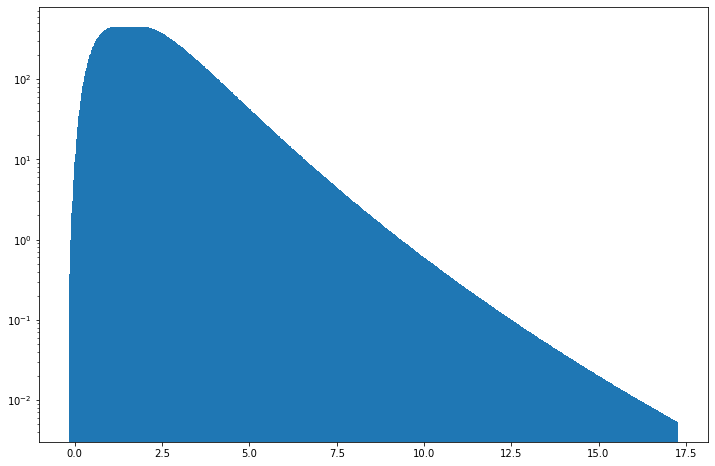

In [19]:
s = .5
fig, ax = plt.subplots(1,1,figsize=(12,8))
ranges = np.linspace(stats.lognorm.ppf(0.00001, s, scale=X),
                stats.lognorm.ppf(0.99999, s, scale=X),
                1000)
logtimes = stats.lognorm.pdf(ranges, s, scale = X) * 1000
plt.bar(ranges, logtimes)
plt.yscale('log');

In [20]:
base = stats.lognorm.ppf(1-five, s, scale=X)
print("Signal strength needed to reach 5 sigmas (Trial factors of 1): " + str(base))
signal2 = stats.expon.ppf(1-five/10000, s, scale=X)
print("Signal strength needed to reach 5 sigmas (Trial factor of 10000): " + str(signal2))
signal3 = stats.expon.ppf(1-five/10000000, s, scale=X)
print("Signal strength needed to reach 5 sigmas (Trial factor of 10000000): " + str(signal3))

factor = signal2/base
print("Signal factor (Trial factor from 1 -> 10000): " + str(factor))
factor = signal3/base
print("Signal factor (Trial factor from 1 -> 10000000): " + str(factor))

Signal strength needed to reach 5 sigmas (Trial factors of 1): 24.364987921043614
Signal strength needed to reach 5 sigmas (Trial factor of 10000): 49.05067584683355
Signal strength needed to reach 5 sigmas (Trial factor of 10000000): 62.86768196951097
Signal factor (Trial factor from 1 -> 10000): 2.0131623297243393
Signal factor (Trial factor from 1 -> 10000000): 2.5802467940159843
